In [97]:
import pandas as pd
file_path = "C:\\Users\\anton\\Desktop\\owid-covid-data.csv" #le doppie sbarre servono per l escape dei caratteri, quindi vanno aggiunte ad ogni sbarra singola una extra
df = pd.read_csv(file_path)
#df.head() chiami le prime righe del database
#df.info() mi da info sulle colonne, il Dtype e il conteggio indiretto dei valori nulli e da come vediamo sono presenti dei nulli
#df.shape ti informa sulle dimensioni del dataset ed e`precisamente 402778 righe e 67 colonne)


#### CASI TOTALI PER CONTINENTE
* andiamo ad interagire sulla colonna nuovi casi dato che la colonna total_cases e`cumulativa e non viene fornito un valore veritiero
* infine creiamo una nuova variabile con i nomi delle colonne desiderati


In [ ]:
maschera = df["continent"].notna() #per evitare di fare cambiamenti sulla variabile df permanenti, creiamo una maschera e andiamo a filtrare il df escludendo le righe che non hanno un continente
df_filtrato = df[maschera]
#1)Troviamo adesso il numero di casi totali per continente
casi_continente = df_filtrato.groupby('continent')['new_cases'].sum().reset_index()
casi_continente = casi_continente.rename(columns={"new_cases":"casi_totali","continent":"continente"}) #esempio cambio di nome delle colonne del Dataframe 
casi_continente

#### COMPARAZIONE TRA MASSIMO E MEDIA(SU CASI MONDIALI PER MILIONE) CON I CASI TOTALI NEL MONDO
* per il calcolo della media usufruiamo la colonna nuovi casi per milione poiche un calcolo come la media va fatto sulla base di una standardizzazione della misura, in questo caso tra continenti a causa del diverso numero di popolazione

In [50]:
#per continuare al punto (2) troviamo i casi totali nel mondo sommando i valori della colonna total_cases e cambiamo il dtype da float a int
casi_mondiali = df["new_cases"].sum() 
casi_mondiali = int(casi_mondiali)
casi_mondiali_permilion = df["new_cases_per_million"].sum()
#2) Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)
continenti = ["Africa","Asia","Europe","North America", "Oceania","South America"]
statistiche_continenti = df.groupby("continent", dropna = False)["new_cases"].agg(['mean','max']).reset_index()
statistiche_continenti['mean_percentage'] = (statistiche_continenti['mean'] / casi_mondiali_permilion) * 100
statistiche_continenti['max_percentage'] = (statistiche_continenti['max'] / casi_mondiali) * 100
statistiche_continenti #dove possiamo vedere che i valori della media e del massimo per ogni continente, corrispondono ad una percentuale precisa sui casi totali nel mondo
#ho interpretato la richiesta in questo modo

continent           mean         max  mean_percentage  max_percentage
0         Africa     144.404660    162987.0         0.000289        0.004959
1           Asia    4016.918128  40475477.0         0.008028        1.231462
2         Europe    3138.010485   2417043.0         0.006271        0.073538
3  North America    1913.288229   5650933.0         0.003824        0.171929
4        Oceania     390.133855    588813.0         0.000780        0.017915
5  South America    3079.069330   1283024.0         0.006154        0.039036
6            NaN  131037.009184  44236227.0         0.261882        1.345882

### GRAFICO A LINEE PER ANALISI TEMPORALE
* tramite l uso di una maschera andiamo a filtrare il df per location Italia e anno 2022, e tramite l uso di seaborn e un grafico a linee osserviamo l andamento temporale.

In [59]:
import seaborn as sns
#Notiamo che per la richiesta successiva e necessario lavorare con le date, quindi tramite un df.info() ci accorgiamo che il datatype della colonna non e` <M8[ns] ma oggetto, quindi convertiamolo in un formato data
df["date"] = pd.to_datetime(df["date"])
'''print(df["date"].dtype) dove otteniamo datetime64 quindi corretto'''
df["year"] = df["date"].dt.year #creo una nuova colonna con solamente gli anni delle date
maschera_dati2022 = df.loc[(df["location"]=="Italy") & (df["year"]==2022)].reset_index()
maschera_dati2022



index iso_code continent location       date  total_cases  new_cases  \
0    173100      ITA    Europe    Italy 2022-01-01    5622431.0        0.0   
1    173101      ITA    Europe    Italy 2022-01-02    6267035.0   644604.0   
2    173102      ITA    Europe    Italy 2022-01-03    6267035.0        0.0   
3    173103      ITA    Europe    Italy 2022-01-04    6267035.0        0.0   
4    173104      ITA    Europe    Italy 2022-01-05    6267035.0        0.0   
..      ...      ...       ...      ...        ...          ...        ...   
360  173460      ITA    Europe    Italy 2022-12-27   25060503.0        0.0   
361  173461      ITA    Europe    Italy 2022-12-28   25060503.0        0.0   
362  173462      ITA    Europe    Italy 2022-12-29   25060503.0        0.0   
363  173463      ITA    Europe    Italy 2022-12-30   25060503.0        0.0   
364  173464      ITA    Europe    Italy 2022-12-31   25060503.0        0.0   

     new_cases_smoothed  total_deaths  new_deaths  ...  \
0             36797.000      136530.0         0.0  ...   
1             92086.286      137513.0       983.0  ...   
2             92086.286      137513.0         0.0  ...   
3             92086.286      137513.0         0.0  ...   
4             92086.286      137513.0         0.0  ...   
..                  ...           ...         ...  ...   
360           18918.143      184168.0         0.0  ...   
361           18918.143      184168.0         0.0  ...   
362           18918.143      184168.0         0.0  ...   
363           18918.143      184168.0         0.0  ...   
364           18918.143      184168.0         0.0  ...   

     hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                          3.18            83.51                    0.892   
1                          3.18            83.51                    0.892   
2                          3.18            83.51                    0.892   
3                          3.18            83.51                    0.892   
4                          3.18            83.51                    0.892   
..                          ...              ...                      ...   
360                        3.18            83.51                    0.892   
361                        3.18            83.51                    0.892   
362                        3.18            83.51                    0.892   
363                        3.18            83.51                    0.892   
364                        3.18            83.51                    0.892   

     population  excess_mortality_cumulative_absolute  \
0    59037472.0                                   NaN   
1    59037472.0                              168226.3   
2    59037472.0                                   NaN   
3    59037472.0                                   NaN   
4    59037472.0                                   NaN   
..          ...                                   ...   
360  59037472.0                                   NaN   
361  59037472.0                                   NaN   
362  59037472.0                                   NaN   
363  59037472.0                                   NaN   
364  59037472.0                                   NaN   

     excess_mortality_cumulative  excess_mortality  \
0                            NaN               NaN   
1                          12.99              8.06   
2                            NaN               NaN   
3                            NaN               NaN   
4                            NaN               NaN   
..                           ...               ...   
360                          NaN               NaN   
361                          NaN               NaN   
362                          NaN               NaN   
363                          NaN               NaN   
364                          NaN               NaN   

     excess_mortality_cumulative_per_million  anno  year  
0                                        NaN  2022  20

### CASI TOTALI SU DATA

<Axes: xlabel='date', ylabel='total_cases'>

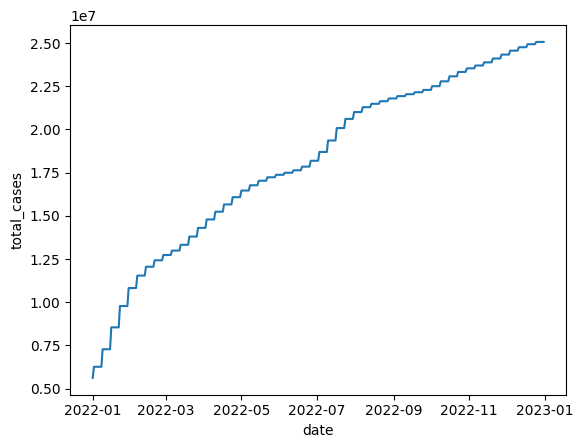

In [60]:
sns.lineplot(maschera_dati2022, x = "date", y = "total_cases")

#### NUOVI CASI PER DATA

<Axes: xlabel='date', ylabel='new_cases'>

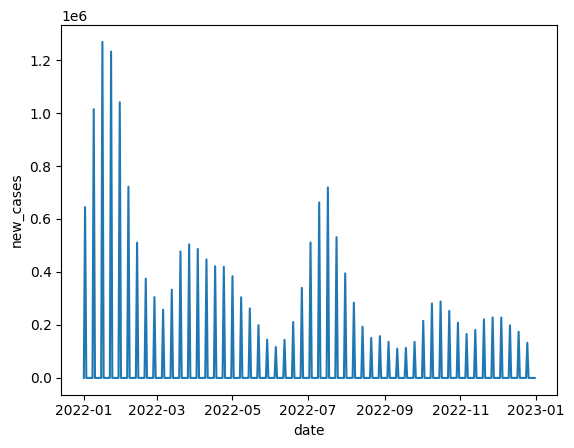

In [61]:
sns.lineplot(maschera_dati2022, x = "date", y = "new_cases")

#### SOMMA DI NUOVI CASI, ANDAMENTO NEI MESI DEL 2022
* notando che tra il mese di Gennaio e Febraio ci sono stati diversi picchi massimi di nuovi casi di malattia, insieme all intervallo che intercorre tra il mese di Luglio e Agosto, molto piu` esplicativo rispetto al grafico sovrastante.

<Axes: xlabel='date'>

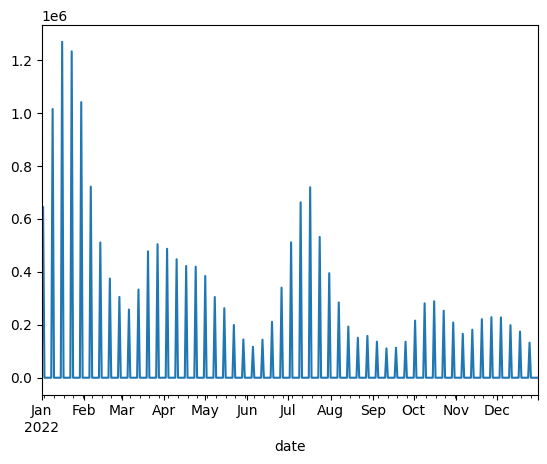

In [66]:
maschera_dati2022.groupby('date')['new_cases'].sum().plot()

### COMPARAZIONI TRA NAZIONI: ITALIA, FRANCIA E GERMANIA, PER IL NUMERO DI PAZIENTI IN TERAPIA IN UN ANNO
* Notiamo dal boxplot che in un anno la nazione che ha avuto piu pazienti in terapia intensiva dal 2022 al 2023 e` la Germania

<Axes: xlabel='location', ylabel='icu_patients'>

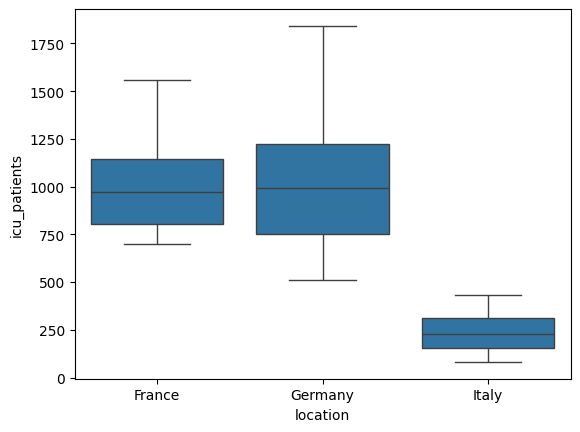

In [77]:
comparazione_nazioni = df.loc[(df["location"]=="Italy")|(df["location"]=="France")|(df["location"]=="Germany")].reset_index()
comparazione_nazioni = comparazione_nazioni.loc[(df['date'] >= '2022-5-1') & (df['date'] <= '2023-4-30')]
sns.boxplot(comparazione_nazioni, x = "location", y ="icu_patients")




### STUDIO SOMMA PAZIENTI OSPEDALIZZATI PER NAZIONE
* essendo che la colonna hosp_patients e` un update, utilizziamo il massimo per vedere il numero piu alto di pazienti ricoverati
* riscontrando la Germania, la colonna e completamente vuota e quindi non e`possibile effettuare un analsi di comparazione, impossibile sostituire i nulli con un altro valore, anche tramite forecasting o sostituzione con un valore di un altra colonna, magari facendo un conto sui guariti e sui morti si potrebbe ipotizzare il numero di persone con condizioni gravi tali da ritenerle ospedalizzate.

In [89]:
seconda_comparazione = df.loc[(df["location"]=="Italy")|(df["location"]=="France")|(df["location"]=="Germany")|(df["location"]=="Spain")].reset_index()
seconda_comparazione = seconda_comparazione.loc[(seconda_comparazione['year']==2023)]
seconda_comparazione = seconda_comparazione.groupby("location")["hosp_patients"].max()



location
France     24157.0
Germany        NaN
Italy       8409.0
Spain       3585.0
Name: hosp_patients, dtype: float64

* analisi della colonna hosp_patients in base alla location Germania, e dal null count possiamo effettivamente vedere che la colonna e completamente vuota poiche vi sono 0 valori non nulli.

In [110]:
df_filtrato = df[df['location'] == 'Germany']
risultato_df = df_filtrato[['location', 'hosp_patients']]
risultato_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, 130839 to 132435
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       1597 non-null   object 
 1   hosp_patients  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 37.4+ KB
